In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import pi,sin

In [3]:
def h(x):
    epsilon = np.random.normal(0, np.sqrt(0.05))
    #epsilon = np.random.normal(0, 0.05, 1)
    return 0.5 + 0.4 * sin(2*pi*x) + epsilon

In [4]:
x =  np.linspace(0,1,11)
h0 = np.array([0.5 + 0.4 * sin(2*pi*x) for x in x])
T = np.array([np.array([h(x) for x in x]) for i in range(100)])

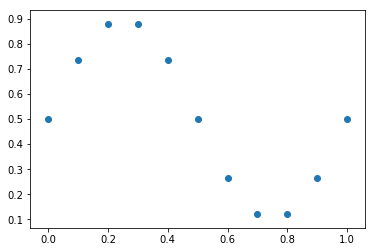

In [5]:
plt.scatter(x, h0)
plt.show()

In [6]:
def P(d):
    return [np.poly1d(np.polyfit(x, t, d).reshape(1,-1)[0]) for t in T]

In [7]:
D = [1,3,6,10]
P_list = [P(d) for d in D]

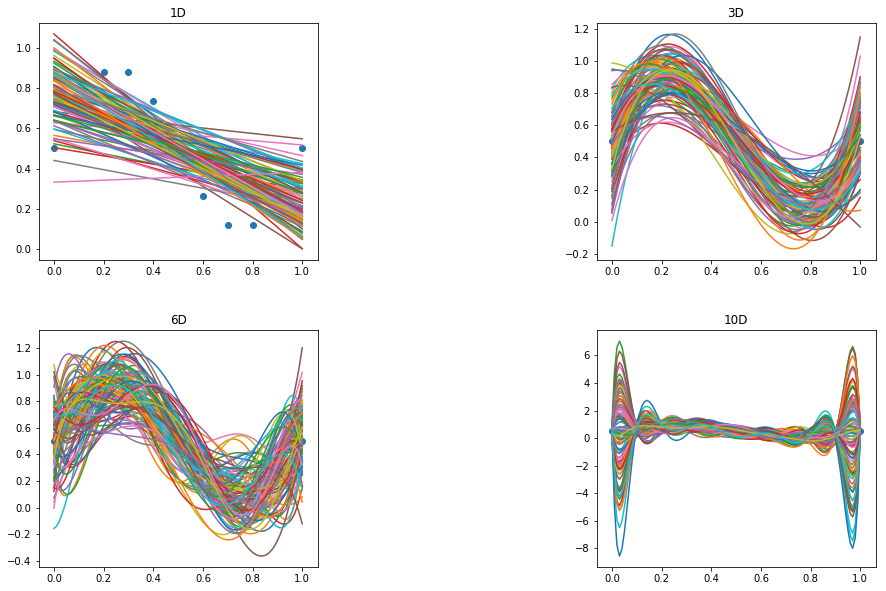

In [8]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1, hspace=0.3)
for i, p in enumerate(P_list):
    plt.subplot(2, 2, i+1)
    p = P_list[i]
    plt.title(str(D[i]) + 'D')
    xp = np.linspace(0, 1,100)
    plt.scatter(x, h0)
    for i in range(0,len(T)):
        plt.plot(xp, p[i](xp))
plt.show()

In [22]:
def Y(p):
    return np.array([p[i](x) for i in range(0,len(T))])
    
Y_vec = np.array([Y(p) for p in P_list])

In [17]:
def bias(y):
    return (np.square((y.mean(axis=0) - T.mean(axis=0))).mean())

In [18]:
def variance(y):
     return np.square(y - y.mean(axis=0)).mean(axis=0).mean()

In [19]:
bias_list = [bias(y) for y in Y_vec]
pd.DataFrame(bias_list)

,0
0,4.248583e-02
1,1.122375e-03
2,9.391904e-05
3,2.486956e-21


In [20]:
variance_list = [variance(y) for y in Y_vec]
pd.DataFrame(variance_list)

,0
0,0.009062
1,0.018176
2,0.031118
3,0.050196


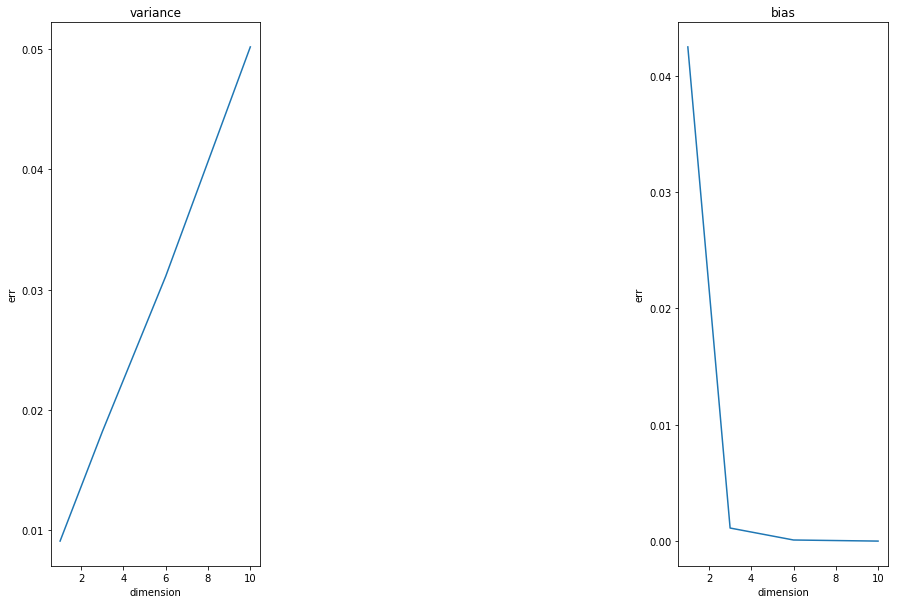

In [21]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=2)

plt.subplot(1, 2, 1)
plt.title('variance')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, variance_list)

plt.subplot(1, 2, 2)
plt.title('bias')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, bias_list)

plt.show()

In [26]:
pd.DataFrame(np.array(bias_list) + np.array(variance_list))

,0
0,0.051548
1,0.019299
2,0.031212
3,0.050196


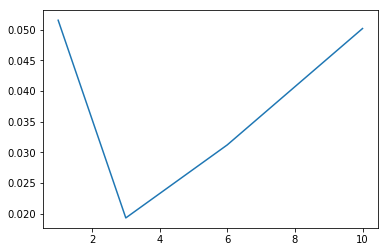

In [27]:
plt.plot(D, np.array(bias_list) + np.array(variance_list))

plt.show()